# Navadeep Pasala

# Data Science Internship @ Crisp Metrics [April-2021]

## Task - 4: Credit Card Fraud Detection
- **Perform Data analysis on the Credit Card Fraud Detection data in depth and use Clustering Algorithms**
- **Dataset link: https://www.kaggle.com/mlg-ulb/creditcardfraud**

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

**Reading the dataset**
 

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19898 entries, 0 to 19897
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    19898 non-null  int64  
 1   V1      19898 non-null  float64
 2   V2      19898 non-null  float64
 3   V3      19898 non-null  float64
 4   V4      19898 non-null  float64
 5   V5      19898 non-null  float64
 6   V6      19898 non-null  float64
 7   V7      19898 non-null  float64
 8   V8      19898 non-null  float64
 9   V9      19898 non-null  float64
 10  V10     19898 non-null  float64
 11  V11     19897 non-null  float64
 12  V12     19897 non-null  float64
 13  V13     19897 non-null  float64
 14  V14     19897 non-null  float64
 15  V15     19897 non-null  float64
 16  V16     19897 non-null  float64
 17  V17     19897 non-null  float64
 18  V18     19897 non-null  float64
 19  V19     19897 non-null  float64
 20  V20     19897 non-null  float64
 21  V21     19897 non-null  float64
 22

In [ ]:
df.shape

(19898, 31)

# **Exploratory Data Analysis**

**Performed a detail EDA on the dataset to :**


**1.   Check for null values. If yes, how to rectify?**

**2.   Check basic statistics of the dataset.**

**3.   Check if the columns are of their correct datatypes.**

**4.   Visualize the dataset according to their Class, Amount and time.**



In [ ]:
df.isnull().values.any()

True

In [ ]:
num_missing = (df[1:31] == 0).sum()
# report the results
print(num_missing)

Time       1
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
Amount     0
Class     30
dtype: int64


In [ ]:
from numpy import nan
from numpy import isnan
from sklearn.impute import SimpleImputer
# replace '0' values with 'nan'
df[1:31] = df[1:31].replace(0, nan)
# drop rows with missing values
df.dropna(inplace=True)
# summarize the shape of the data with missing rows removed
print(df.shape)

# retrieve the numpy array
values = df.values
# define the imputer
imputer = SimpleImputer(missing_values=nan, strategy='mean')
# transform the dataset
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print('Missing: %d' % isnan(transformed_values).sum())

(19867, 31)
Missing: 0


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [ ]:
df.Class = df.Class.fillna(0).astype(int)
print(df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


Text(0, 0.5, 'Frequency')

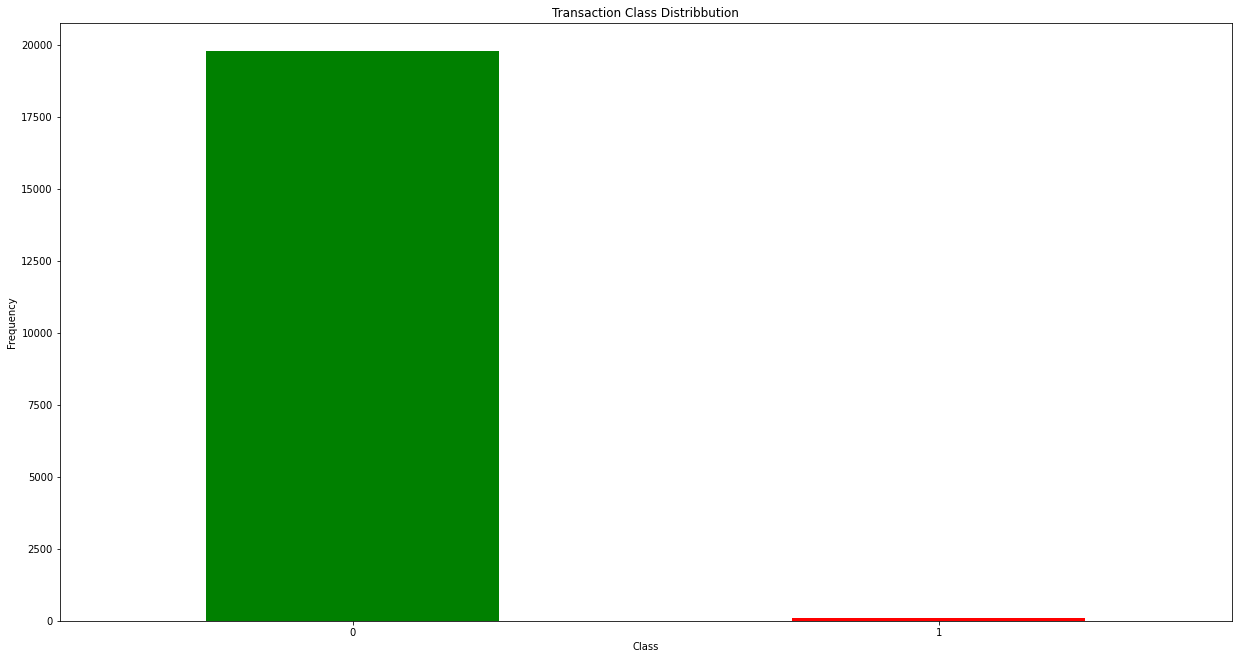

In [ ]:
count_classes = pd.value_counts(df['Class'], sort =True)
count_classes.plot(kind = 'bar', rot = 0, color =[ 'green','red'])
plt.title("Transaction Class Distribbution")
plt.xticks(range(2))
plt.xlabel("Class")
plt.ylabel("Frequency")

**The above bar plot states that, there are only a few fraud transactions compared to genuine transactions.**

In [ ]:
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

In [ ]:
print(fraud.shape)
print(normal.shape)

(85, 31)
(19782, 31)


In [ ]:
fraud.Amount.describe()

count      85.000000
mean       93.869647
std       261.736641
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
normal.Amount.describe()

count    19782.000000
mean        70.202074
std        205.222303
min          0.000000
25%          5.902500
50%         16.055000
75%         59.950000
max       7879.420000
Name: Amount, dtype: float64

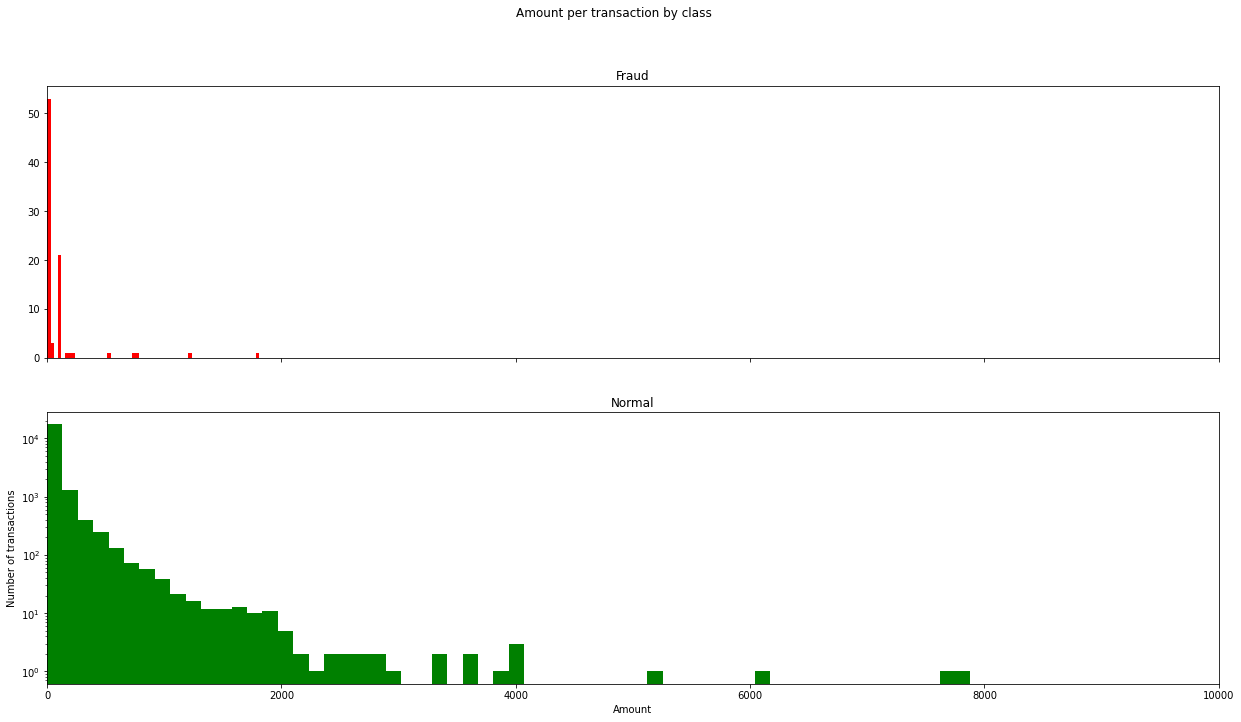

In [ ]:
p, (ax1, ax2) = plt.subplots(2,1, sharex = True)
p.suptitle('Amount per transaction by class')
bins = 60
ax1.hist(fraud.Amount, bins = bins, color='red')
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins, color='green')
ax2.set_title('Normal')
plt.rcParams["figure.figsize"] = (21, 11)
plt.xlabel('Amount')
plt.ylabel('Number of transactions')
plt.xlim((0,10000))
plt.yscale('log')
plt.show()

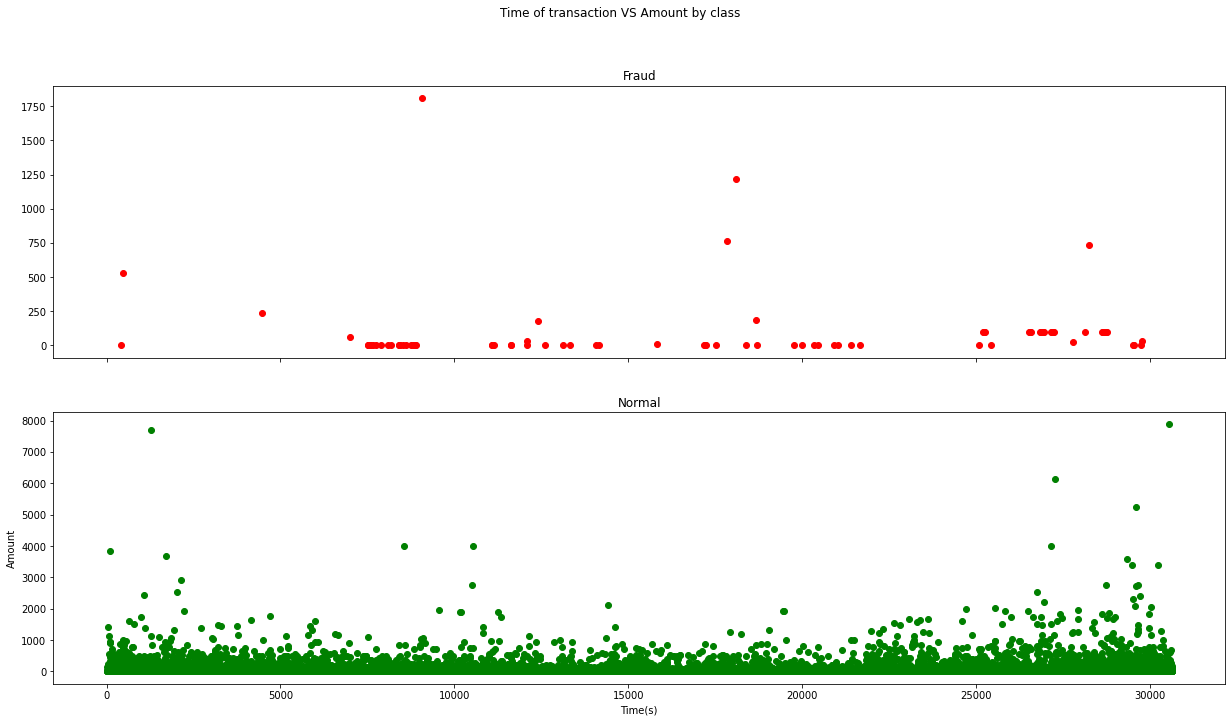

In [ ]:
t, (ax1,ax2) = plt.subplots(2, 1, sharex = True)
t.suptitle('Time of transaction VS Amount by class')
ax1.scatter(fraud.Time, fraud.Amount, color='red')
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount, color='green')
ax2.set_title('Normal')
plt.xlabel('Time(s)')
plt.ylabel('Amount')
plt.show()

## **Data Preparation**

I have taken a small part of the dataset as it would take a long time to execute the o/p of larger datasets. Out of that data, I have shown the number of Genuine and fraud cases respectively.


In [ ]:
data = df.sample(frac = 0.2,random_state = 1)
data.shape

(3973, 31)

In [ ]:
Genuine = data[data['Class']==0]
Fraud = data[data['Class']==1]
outlier_fraction = len(Fraud)/float(len(Genuine))
print('Outlier Fraction :',outlier_fraction)
print('Genuine Cases : {}'.format(len(Genuine)))
print('Fraud Cases : {}'.format(len(Fraud)))

Outlier Fraction : 0.006332320162107396
Genuine Cases : 3948
Fraud Cases : 25


## **Correlation**

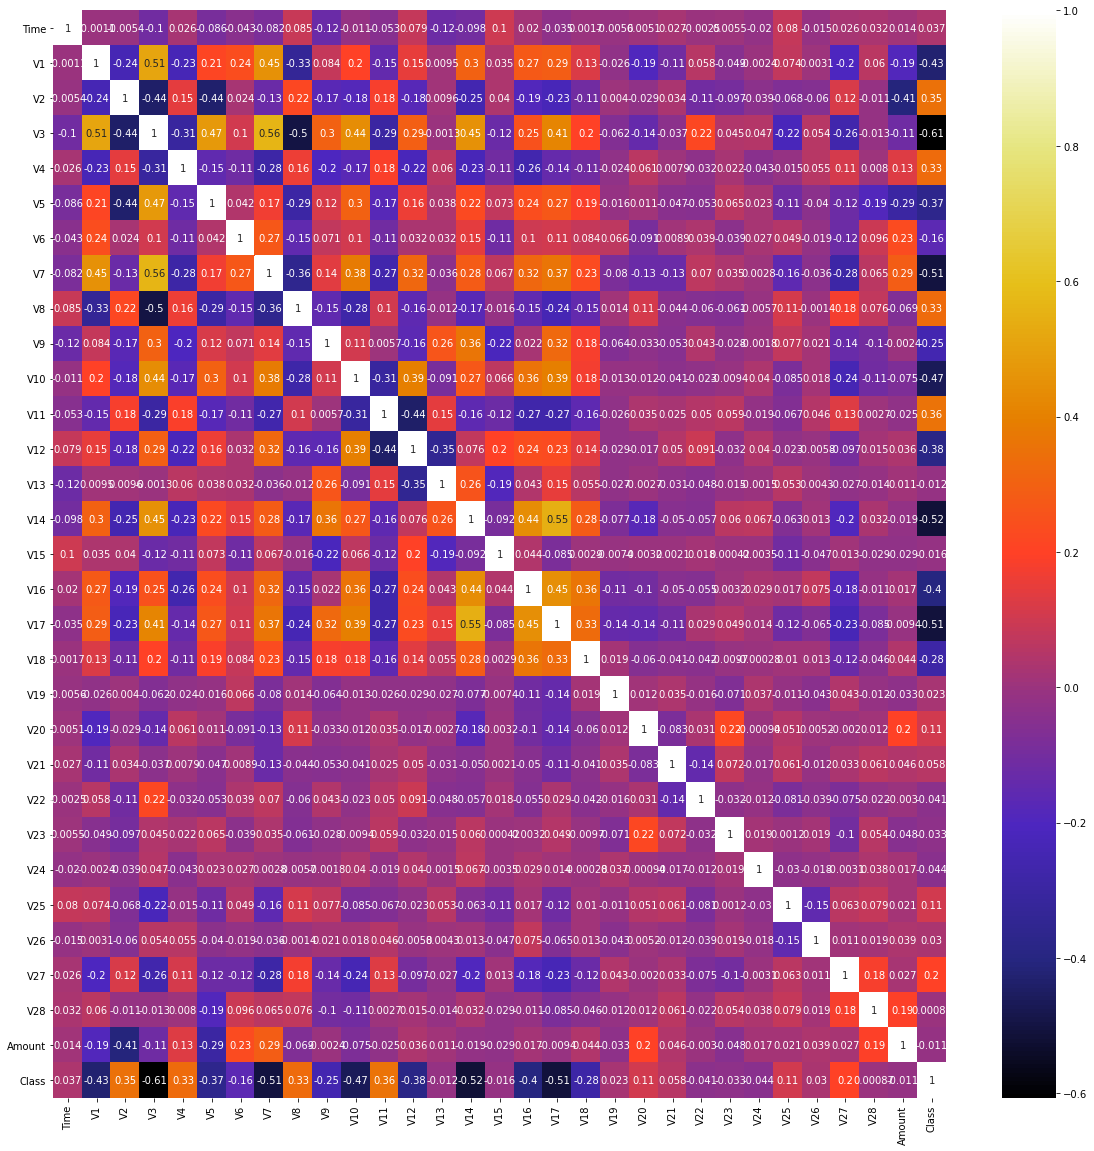

In [ ]:
corr_da = data.corr()
corr_features = corr_da.index
plt.figure(figsize = (20,20))
b = sns.heatmap(data[corr_features].corr(),annot=True,cmap="CMRmap")

 **Elbow Method**

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

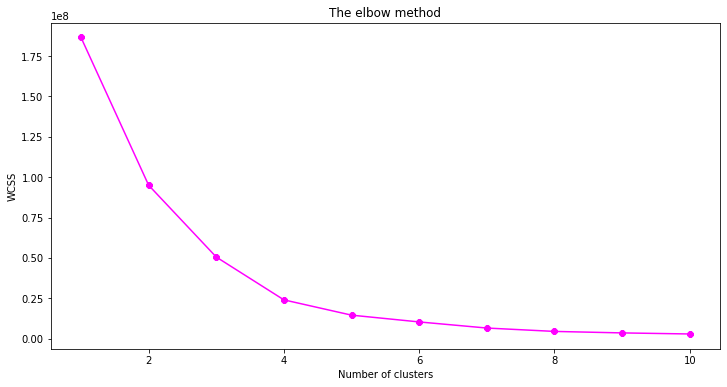

In [ ]:
x = data.iloc[:,1: ].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 50)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize=(12,6))
plt.grid
plt.plot(range(1, 11), wcss, color = 'magenta', marker = "8")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


From the above graph we can conclude that the optimum number of clusters is found where the curve(elbow) occurs.

**CREATING K-MEANS CLASSIFIER**

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 2, init = 'k-means++',
                max_iter = 500, n_init = 10, random_state = 50)
y_kmeans = kmeans.fit_predict(x)

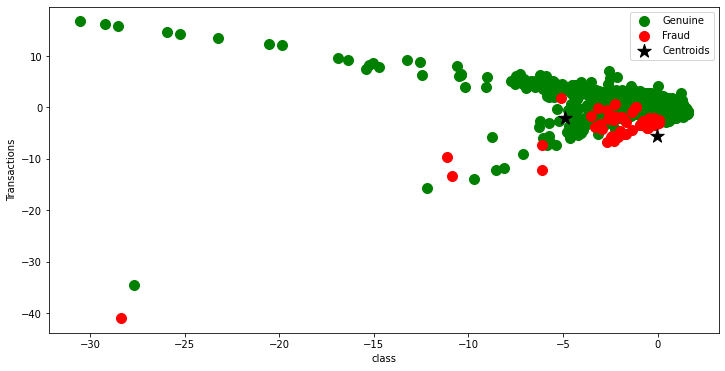

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Genuine')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Fraud')

plt.scatter(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0,1], marker  = '*', s = 200, c = 'black', label = 'Centroids')
plt.scatter(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1,1], marker = '*', s = 200, c = 'black')
plt.xlabel('class')
plt.ylabel('Transactions')
plt.legend()
plt.show()

The above plot shows us the 2 clusters : Genuine(Green color) & Fraud(Red color) with their respective centroids.

But the issue is that they are overlappig each other. To rectify this, we perform the below steps.

**TO RECTIFY OVERLAPPING OF CLUSTERS**

In [ ]:
from sklearn.datasets import make_blobs
dataset = make_blobs(n_samples = 1000, centers = 2, n_features=2, cluster_std=1.6, random_state=50)

In [ ]:
points = dataset[0]

In [ ]:
# import kmeans
from sklearn.cluster import KMeans

In [ ]:
# Create K_means objects
kmeans = KMeans(n_clusters=2)

# Fit the Kmeans object to the dataset
kmeans.fit(points)
print("The overlapping of clusters is rectified.")

The overlapping of clusters is rectified.


**VISUALIZING THE CLUSTERS**

In [ ]:
clusters = kmeans.cluster_centers_
print(clusters)

[[-4.9157015  -2.04486171]
 [-0.0543247  -5.50258267]]


In [ ]:
# To recalcuate the positions of the clusters
ykm = kmeans.fit_predict(points)
ykm

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [ ]:
points

array([[ 1.96114026, -5.98922246],
       [ 2.7243868 , -4.66816151],
       [-2.17379936, -4.24648942],
       ...,
       [-1.31033639, -4.36479623],
       [-0.01697921, -8.55205287],
       [-1.71942974, -1.41898061]])

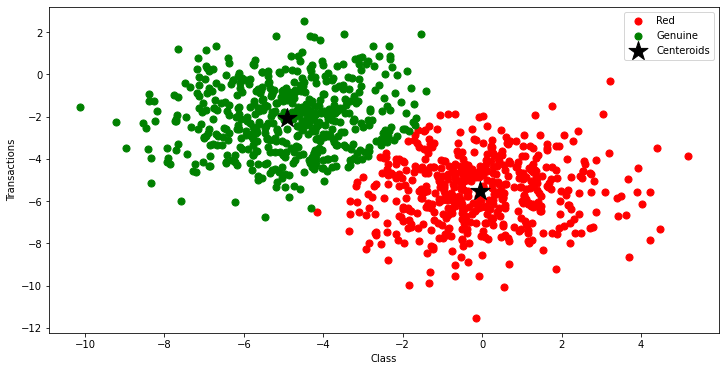

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(points[ykm == 0,0], points[ykm == 0,1], s = 50, color = 'red', label = 'Red')
plt.scatter(points[ykm == 1,0], points[ykm == 1,1], s = 50, color = 'green', label = 'Genuine')
plt.scatter(clusters[0][0], clusters[0][1], marker = '*', s = 400, color = 'black')
plt.scatter(clusters[1][0], clusters[1][1], marker = '*', s = 400, color = 'black', label = 'Centeroids')
plt.xlabel('Class')
plt.ylabel('Transactions')
plt.legend()
plt.show()

### **CONCLUSION**

The above plot depicts that,


1.   The number of fraud transations (Red)
2.  The number of genuine transactions (Green)
